# COMPARING DIFFERENT CLASSIFICATION MODELS 2

Follow up of what I did previously. 

Decided to see how different models behaved on non linear data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1 - Generating the data
Artificially created data.
* Points inside a circle with origin 0 and radius 1 are labeled 0.
* Points outside this circle are labelled 1.

In [50]:
#### DATA ####

# generating data

# r in [0,1] & [1,1.7]
# theta in [0, 2pi]
# x = r*cos(theta)
# y = r*sin(theta)

# 100 points 
r1 = np.random.uniform(low=0, high=1, size=(100))
r2 = np.random.uniform(low=1, high=1.7, size=(100))
theta = np.random.uniform(low=0, high=2*np.pi, size=(100))

x1 = r1*np.cos(theta)
y1 = r1*np.sin(theta)

x2 = r2*np.cos(theta)
y2 = r2*np.sin(theta)

label1 = np.zeros(100)
label2 = np.ones(100)

x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
label = np.concatenate((label1, label2))

data = np.column_stack([x,y,label])

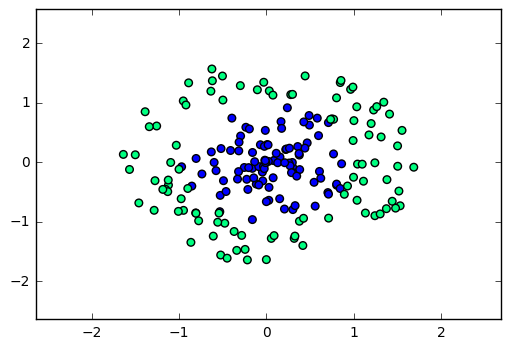

In [51]:
#### FIRST LOOK AT THE DATA ####

x_min, x_max = min(x) - 1, max(x) + 1 
y_min, y_max = min(y) - 1, max(y) + 1

plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap='winter', s=30)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [44]:
#### PLOT FUNCTION ####

def plot():
    clf.fit(data[:,:2], data[:,2]) 
    
    # MESHGRID
    # we create a grid of points 
    # then we predict the class for those points
    # this is how we determine the color of a 'zone'
    
    # creation of the grid
    x_min, x_max = min(x) - 1, max(x) + 1 
    y_min, y_max = min(y) - 1, max(y) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid_to_predict = np.c_[xx.ravel(), yy.ravel()]

    # reverse PCA to be able to do the prediction 
    # NB what we get is of course an approximation
    Z = clf.predict(grid_to_predict)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='winter')

    # Compare with test data to see how well the model did 
    plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap='winter', s=30)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

# 2 - Logistic Regression
* Linear model

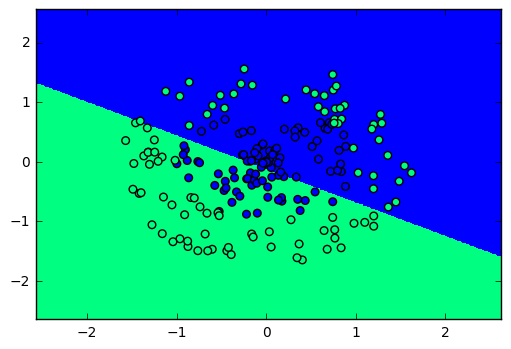

In [45]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
plot()

# 3 - K Neighbors Classifier

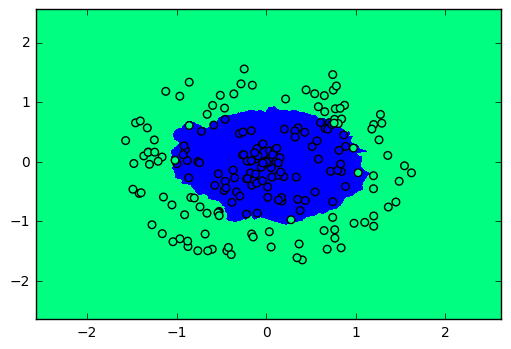

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)
plot()

# 4 - Naïve Bayes

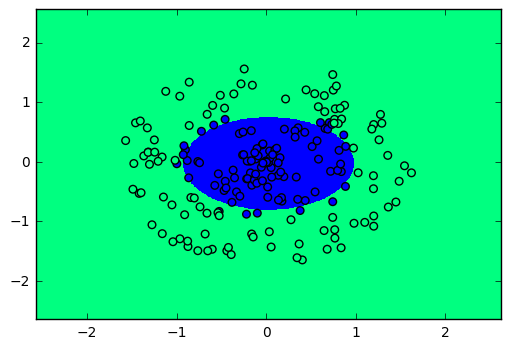

In [47]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
plot()

# 5 - Random Forest

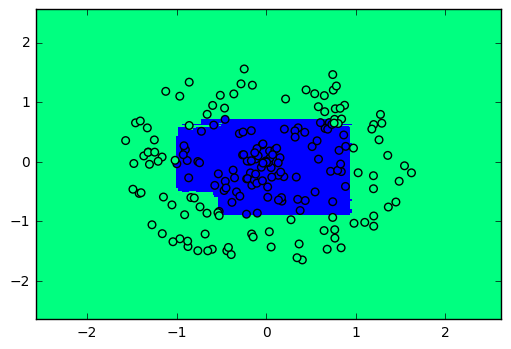

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
plot()